Netflix Exploratory Data Analysis!

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\adity\Desktop\Mini project\netflix_titles.csv")

In [170]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [171]:
data[data.duplicated()]    #To check if there are any duplicate data present in the data set

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There exist no duplicate data in our dataset.

In [172]:
data.isnull().sum()     #To check the number of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [173]:
data = data.dropna()         #To drop all the rows with null values

In [174]:
data.isnull().sum()          #Again checking the count of null values to confirm all null values are removed

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [175]:
data['release_year'].min()       #To find the minimum value present in the release_year column

1942

In [176]:
data['release_year'].max()       #To find the maximum value present in the release_year column

2021

Since we don't require so much historical data for the analysis, we'll remove the rows whose release_year 
value is less then 2006 to keep records of past 15 years in the dataset.

In [177]:
data = data[data['release_year'] > 2006]

In [178]:
len(data)        #These many rows are present in our dataset

4523

Q1.	What is the distribution of movie types (e.g., Movies, TV Shows) in the dataset?

Text(0, 0.5, '')

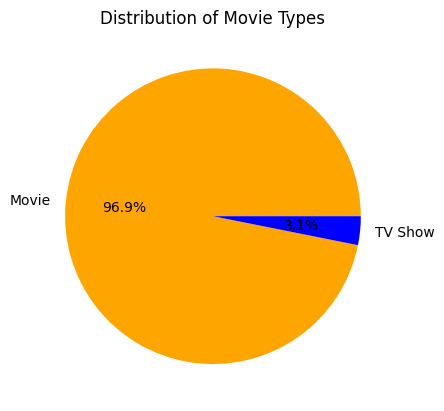

In [179]:
type_distribution = data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'blue'])
type_distribution.set_title('Distribution of Movie Types')
type_distribution.set_ylabel('')

Q2.	Which countries produce the most content on Netflix?

Text(0, 0.5, 'Count')

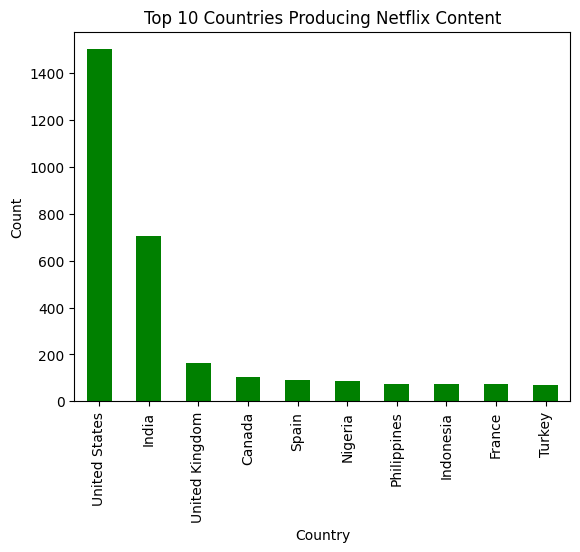

In [180]:
country_distribution = data['country'].value_counts()
top_countries = country_distribution.head(10).plot(kind='bar', color='green')
top_countries.set_title('Top 10 Countries Producing Netflix Content')
top_countries.set_xlabel('Country')
top_countries.set_ylabel('Count')

Q3. What is the distribution of content ratings?

Text(0, 0.5, 'Count')

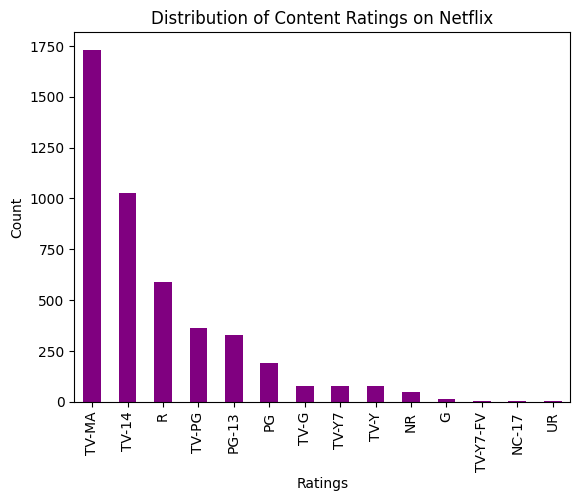

In [181]:
rating_distribution = data['rating'].value_counts().plot(kind='bar', color='purple')
rating_distribution.set_title('Distribution of Content Ratings on Netflix')
rating_distribution.set_xlabel('Ratings')
rating_distribution.set_ylabel('Count')

Q4.	How has the number of titles added to Netflix changed over the years?

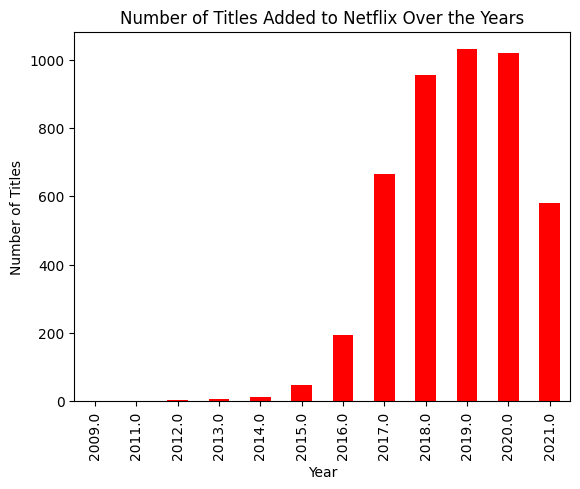

In [182]:
data['Date Added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['Year Added'] = data['Date Added'].dt.year
titles_added_per_year = data['Year Added'].value_counts().sort_index()
titles_added_per_year.plot(kind='bar', color='red')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

Q5.	Who are the top directors with the most content on Netflix?

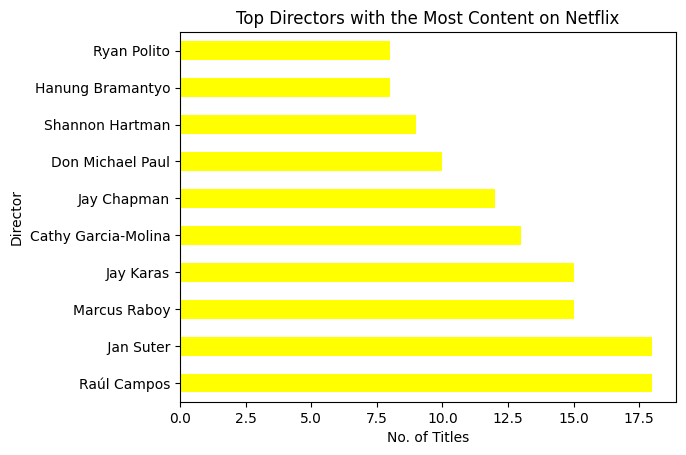

In [183]:
data['Director'] = data['director'].str.split(',')
directors_data = data.explode('Director')
top_directors = directors_data['Director'].value_counts().head(10)
top_directors.plot(kind='barh', color='yellow')
plt.title('Top Directors with the Most Content on Netflix')
plt.xlabel('No. of Titles')
plt.ylabel('Director')
plt.show()

Q6.	In which year highest number of TV shows and Movies were released?

In [184]:
data.dtypes      #to check the datatype of release_year column

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Date Added      datetime64[ns]
Year Added             float64
Director                object
dtype: object

In [185]:
data['release_year'].value_counts()

release_year
2017    657
2018    648
2016    577
2019    519
2020    442
2015    349
2014    242
2013    197
2012    163
2021    161
2010    140
2011    135
2009    112
2008    110
2007     71
Name: count, dtype: int64

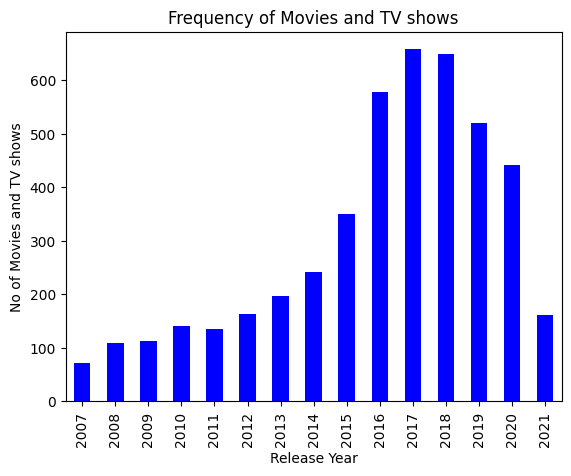

In [186]:
Release_years = data['release_year'].value_counts().sort_index()
Release_years.plot(kind='bar', color='blue')
plt.title('Frequency of Movies and TV shows')
plt.xlabel('Release Year')
plt.ylabel('No of Movies and TV shows')
plt.show()

Q7.	What is the average duration of Movies and TV Shows?

In [187]:
data['duration'] = pd.to_numeric(data['duration'].str.extract('(\d+)')[0], errors='coerce')
movies_data = data[data['type'] == 'Movie']['duration']
tvshows_data = data[data['type'] == 'TV Show']['duration']
avg_movie_duration = movies_data.mean()
avg_tvshows_duration = tvshows_data.mean()
print(f"Average Duration of Movies: {avg_movie_duration:.2f} minutes")
print(f"Average Duration of TV Shows: {avg_tvshows_duration:.2f} seasons")

Average Duration of Movies: 100.36 minutes
Average Duration of TV Shows: 1.88 seasons


Q8. Which actors or actresses appear most frequently in Netflix content?

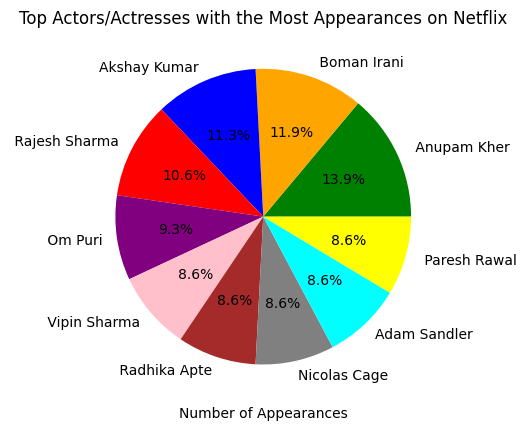

In [188]:
data['Cast'] = data['cast'].str.split(',')
cast_data = data.explode('Cast')
top_cast = cast_data['Cast'].value_counts().head(10)
top_cast.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'blue', 'red', 'purple', 'pink', 'brown', 'gray', 'cyan', 'yellow'])
plt.title('Top Actors/Actresses with the Most Appearances on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('')  
plt.show()

Q9. What is the distribution of content by genre?

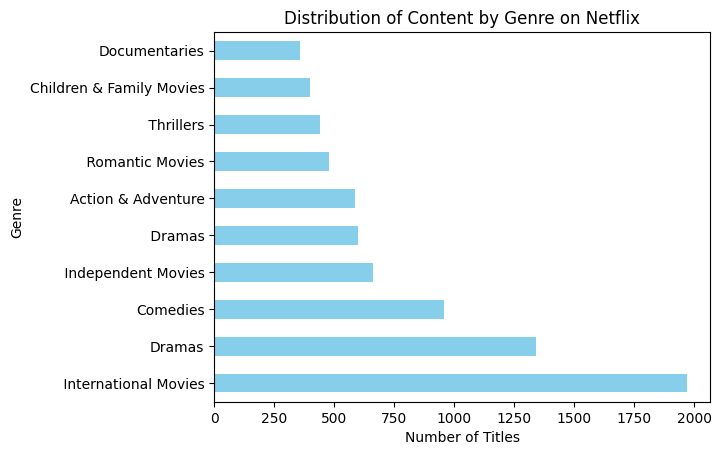

In [189]:
data['Genre'] = data['listed_in'].str.split(',')
genres_df = data.explode('Genre')
genre_distribution = genres_df['Genre'].value_counts()
top_genres = genre_distribution.head(10)
top_genres.plot(kind='barh', color='skyblue')
plt.title('Distribution of Content by Genre on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

Q10. What is the trend in the number of TV shows versus movies over the years?

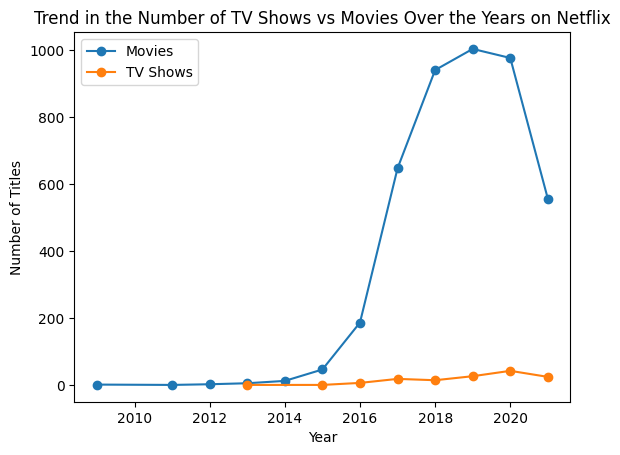

In [190]:
data['Date Added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['Year Added'] = data['Date Added'].dt.year
movies_per_year = data[data['type'] == 'Movie']['Year Added'].value_counts().sort_index()
tv_shows_per_year = data[data['type'] == 'TV Show']['Year Added'].value_counts().sort_index()
plt.plot(movies_per_year.index, movies_per_year.values, label='Movies', marker='o')
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='TV Shows', marker='o')
plt.title('Trend in the Number of TV Shows vs Movies Over the Years on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

Q11. Show only the Titles of all the TV Shows that were released in India.

In [191]:
data[(data['type'] == 'TV Show') & (data['country'] == 'India')]['title']

297                                  Navarasa
1293                            Pitta Kathalu
1520                          Paava Kadhaigal
3036             Jamtara - Sabka Number Ayega
4685                                    GHOUL
6024                                7 (Seven)
8172    Th Eena Meena Deeka Chase Comedy Show
Name: title, dtype: object